In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np

# Load the dataset
data = pd.read_csv('hotel.csv')

# Drop unnecessary columns
data.drop(columns=['Client', 'Day'], inplace=True)

# Define the target variable and separate features and target
target = 'Price'
X = data.drop(target, axis=1)
y = data.loc[:, target]

# Encode categorical features
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=20)

# Initialize the regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [5]:
y_pred = model.predict(X_test)

In [6]:
print(list(X))
print(model.coef_)
print(model. intercept_)

['Hotel_name', 'Date', 'Rating', 'Grade', 'Address']
[ 5.12417789e+04 -1.23454071e+05 -7.87471019e+04 -8.64773217e+03
  1.20480363e+05  7.34315976e+04 -5.26088051e+04 -5.16365456e+04
 -1.84947466e+05 -6.70424777e+04 -5.17875454e+04 -1.09745656e+05
 -1.41745489e+05 -5.88250960e+04  1.25971376e+05 -4.00728399e+04
  2.77594124e+04 -4.47419103e+04  5.40122629e+05  7.76319391e+04
 -2.40733670e+04 -8.05051262e+02  1.21327950e+05  9.14115715e+04
 -8.45960971e+04  1.51550496e+02 -3.65744588e+04 -3.27839457e+04
 -1.11105955e+04 -9.20472205e+04  8.10912964e+03  2.78214054e+05
 -1.70400839e+04  2.28655425e+05  4.76353863e+04 -4.77480721e+04
 -5.19285443e+04  7.42752619e+04  3.44050351e+04 -1.08863098e+05
 -1.36516201e+04 -1.13142939e+05  1.76378982e+05  4.36469762e+04
  7.09320844e+03 -1.46944725e+05  1.28244719e+05  6.80012107e+04
 -1.48662160e+05 -5.00832566e+04 -4.05987769e+04  4.20756897e+04
  1.09894243e+05 -1.44450987e+05 -5.67051969e+03  1.44268105e+03
 -7.36849989e+03  1.03484438e+05 -8.5

In [7]:
# 실젯값, 예측값 비교
print(y_test.values[:10])
print(y_pred[:10])

[  69091  370182   98946 1800000  170000   79850  214215   82857  103322
   35362]
[ 77581.28112316 296195.18169275 106813.24166211 767385.21158148
 190663.16721087  94833.21520656 289304.84602007  86381.72025793
  88957.83761271  44671.32357888]


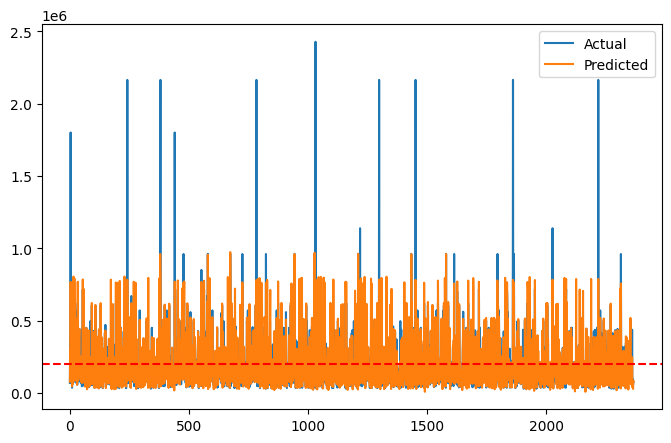

In [8]:
import matplotlib.pyplot as plt
# 실젯값, 예측값 시각화
plt.figure(figsize=(8, 5))
plt.plot(y_test.values)
plt.plot(y_pred)
plt.axhline(y_test.mean(), color='r', linestyle='--')
plt.legend(['Actual', 'Predicted'])
plt.show()

In [9]:
# 함수 불러오기
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# 성능 평가
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))
print('R2-Score:', r2_score(y_test, y_pred))

MAE: 41660.1846706525
MSE: 14165392191.040693
RMSE: 119018.45315345303
R2-Score: 0.6672045704541165


In [10]:
# 성능 평가
print('Score:', model.score(X_test, y_test))

Score: 0.6672045704541165


In [19]:
def predict_hotel_price(Hotel_name, Date, Rating, Grade, Address):
    # Preprocess the user input to match the format of the training data
    user_input = pd.DataFrame({
        'Hotel_name': [Hotel_name],
        'Date': [Date],
        'Rating': [Rating],
        'Grade': [Grade],
        'Address': [Address]
    })

    # Perform one-hot encoding for categorical features
    user_input_encoded = encoder.transform(user_input)

    # Make predictions
    predicted_price = model.predict(user_input_encoded)

    return predicted_price[0]

# Example usage
Hotel_name = "휘닉스 제주 섭지코지"
Date = "2023-07-25"
Rating = 7.8
Grade = 5
Address = "서귀포, 대한민국"

predicted_value = predict_hotel_price(Hotel_name, Date, Rating, Grade, Address)
print(f"Predicted price for {Hotel_name} on {Date} with {Rating} Rating, Grade {Grade}, and Address {Address}: {predicted_value}")

Predicted price for 휘닉스 제주 섭지코지 on 2023-07-25 with 7.8 Rating, Grade 4, and Address 서귀포, 대한민국: 315390.4791841465


In [20]:
import joblib

#피클링 파일 생성
joblib.dump(model, './hotel_model.pkl')

['./fhotel_model.pkl']